In [1]:
import pandas as pd 
import json 
import ast 
import copy
import matplotlib.pyplot as plt
import seaborn as sns 

In [2]:
first_total_list = []
for i in range(21, 26): 
    with open(f'logt{i}.txt', 'r') as total_file: 
        try: 
            for line in total_file: 
                first_total_list.append(line)
        except ValueError: 
            print(f'Fail appending at line {line}')

In [3]:
first_total_dict = [ast.literal_eval(line) for line in first_total_list]

In [4]:
df1 = pd.DataFrame(first_total_dict)

In [5]:
second_total_list = []
for i in range(31, 33): 
    with open(f'logt{i}.txt', 'r') as total_2ndfile: 
        try: 
            for line in total_2ndfile:
                second_total_list.append(line)
        except ValueError: 
            print(f'Fail appending at line{line}')

In [6]:
second_total_dict = [ast.literal_eval(line) for line in second_total_list]

In [7]:
df2 = pd.DataFrame(second_total_dict)

In [8]:
df = pd.concat([df1, df2], ignore_index=True)

In [9]:
analysis = copy.deepcopy(df)

In [10]:
analysis = analysis.loc[:, ['Mac', 'CustomerID', 'ItemName', 'Duration', 'AppName', 'Screen', 'Event']]

In [11]:
analysis.columns

Index(['Mac', 'CustomerID', 'ItemName', 'Duration', 'AppName', 'Screen',
       'Event'],
      dtype='object')

In [12]:
app_count = analysis.groupby('AppName')['AppName'].count().rename('Total').reset_index()

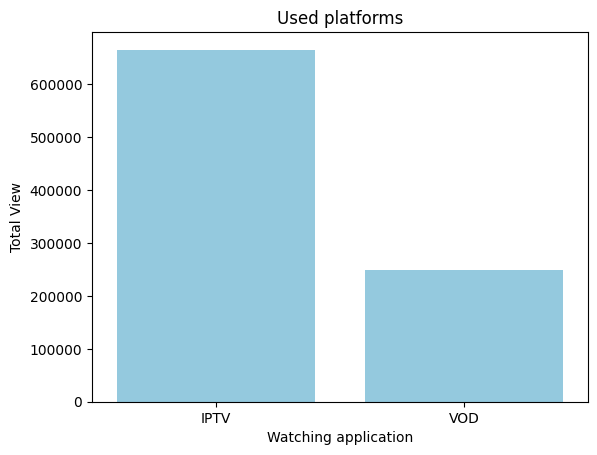

In [13]:
sns.barplot(data=app_count, x='AppName', y='Total', color='skyblue')
plt.title('Used platforms')
plt.xlabel('Watching application')
plt.ylabel('Total View')
plt.show()

In [14]:
event_count = analysis.groupby('Event')['Event'].count().rename('Total').reset_index()
event_count = event_count.sort_values(by='Total', ascending=False)

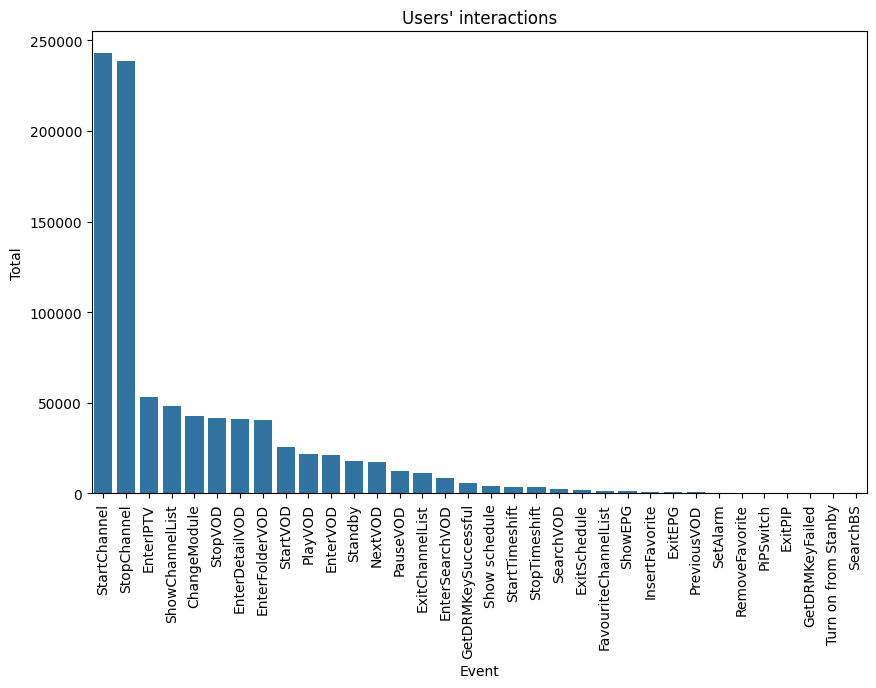

In [15]:
plt.figure(figsize=(10, 6))
sns.barplot(data=event_count, x='Event', y='Total')
plt.title("Users' interactions")
plt.xticks(rotation='vertical')
plt.show()

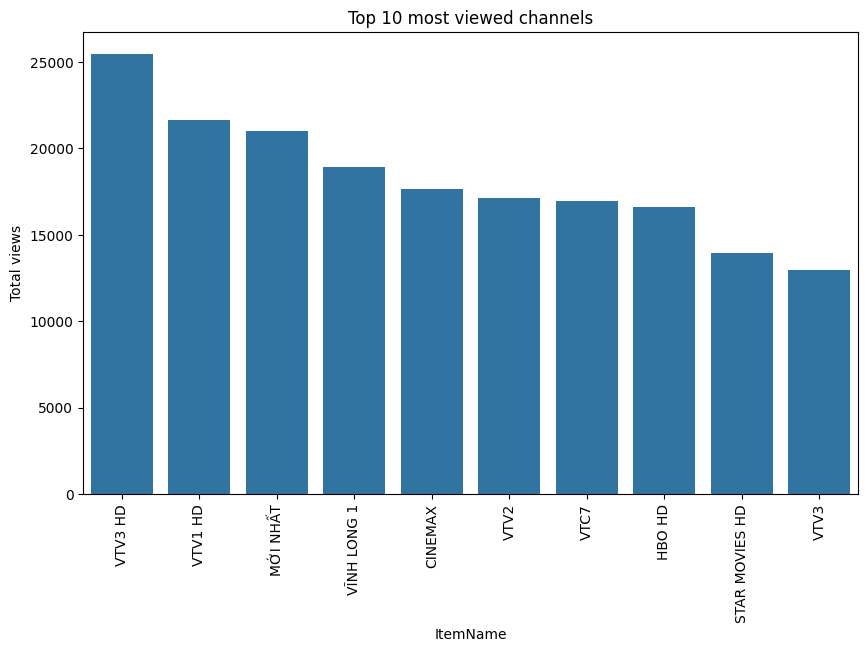

In [16]:
item_analysis = copy.deepcopy(analysis.loc[analysis['ItemName'].isna() != True, :])
#Top 10 most watched channels
top_item = item_analysis['ItemName'].value_counts().rename('Total views').reset_index().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_item, x='ItemName', y='Total views')
plt.title('Top 10 most viewed channels')
plt.xticks(rotation='vertical')
plt.show()

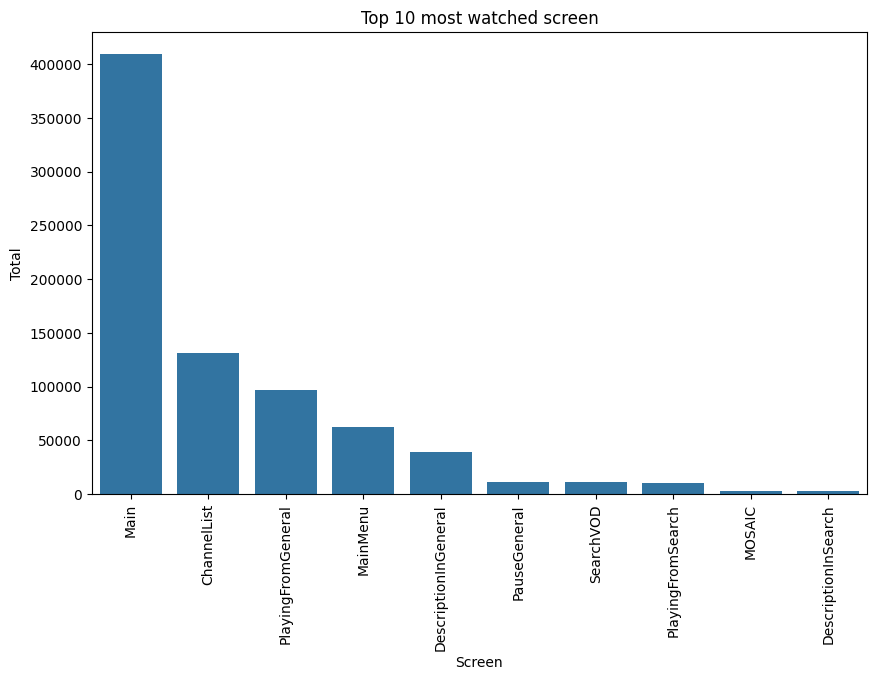

In [17]:
screen_analysis = analysis.loc[analysis['Screen'].isna() == False, :]
screen_calculate = screen_analysis.groupby('Screen')['Screen'].count().rename('Total').reset_index()
screen_calculate = screen_calculate.sort_values(by='Total', ascending=False)
top_screen = screen_calculate.head(10)
plt.figure(figsize=(10, 6))
sns.barplot(data=top_screen, x='Screen', y='Total')
plt.xticks(rotation='vertical')
plt.title('Top 10 most watched screen')
plt.show()

In [18]:
user_list = []
with open('user_info.txt', 'r') as user_file: 
    try: 
        for line in user_file:
            user_list.append(line)
    except ValueError: 
        print(f'Fail appending at line {line}')

In [19]:
user_dict = [line.split('\t') for line in user_list]
user_df = pd.DataFrame(user_dict, columns=['MAC', 'Total of days'])
user_df = user_df.iloc[1:]
days_pattern = r'(\d+).*'
user_df['Total of days'] = user_df['Total of days'].str.extract(days_pattern)
user_df['Total of days'] = pd.to_numeric(user_df['Total of days'])
user_df = user_df.rename(columns={'MAC': 'Mac'})
user_df = user_df.sort_values(by='Total of days', ascending=True)

In [20]:
total_users = len(user_df['Mac'].unique())
active_users = len(analysis['Mac'].unique())
print(f'The total users is at {total_users}')
print(f'The total active users is at {active_users}')

The total users is at 2664
The total active users is at 1693


In [21]:
user_pattern = r'.{4}(.*)'
formatted_user = copy.deepcopy(user_df['Mac'].str.extract(user_pattern))
formatted_user = formatted_user.rename(columns={0: 'Mac'})

In [22]:
total_users_list = list(formatted_user['Mac'].unique())
active_users_list = list(analysis['Mac'].unique())
inactive_users_list = []
for i in range(len(total_users_list)): 
    if total_users_list[i] not in active_users_list: 
        inactive_users_list.append(total_users_list[i])

print(f'Total users that might quit using the products is {len(inactive_users_list)} users')

Total users that might quit using the products is 971 users
